In [68]:
import numpy as np
import matplotlib.pyplot as plt 
from skimage import data
from skimage import filters
import numpy as np
import cv2
from matplotlib import pyplot as plt

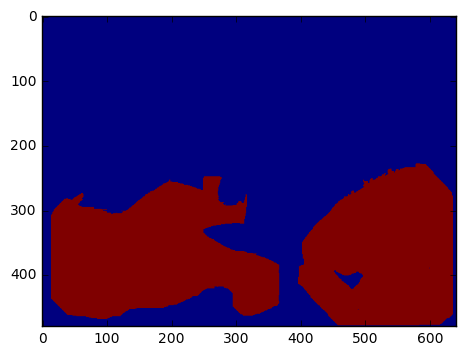

In [73]:
# load the data
img = cv2.imread("rgb_10561.png")
file = open("rgb_10561.txt", "r")
one_line = file.readline()
box_list = []

# preprocess data
while (one_line != ''):
    if "person" in one_line:
        one_line = file.readline()
        num = one_line.split(']')[1]
        num = num.split(',')
        left = int(num[0])
        right = int(num[1])
        top = int(num[2])
        bot = int(num[3])
        box_list.append((left, right, top, bot))
    else:
        one_line = file.readline()

# apply energy based seg
mask2 = np.zeros((img.shape[0], img.shape[1]))
for each_box in box_list:
    mask = np.zeros(img.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    rect = each_box
    x = rect[0]  
    w = rect[1] - rect[0] 
    y = rect[2]
    h = rect[3] - rect[2]

    rect = (x,y,w,h)
    cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
    mask2 += np.where((mask==2)|(mask==0),0,1).astype('uint8')

# plot mask only
plt.imshow(mask2)
plt.show()

# plot the original image with mask

# print (mask2.shape)
# img = img*mask2[:,:,np.newaxis]
# plt.imshow(img),plt.colorbar(),plt.show()